# **Ekstraksi Garis dengan Hough Transform**

Hough Transform digunakan untuk mendeteksi garis dalam sebuah gambar.

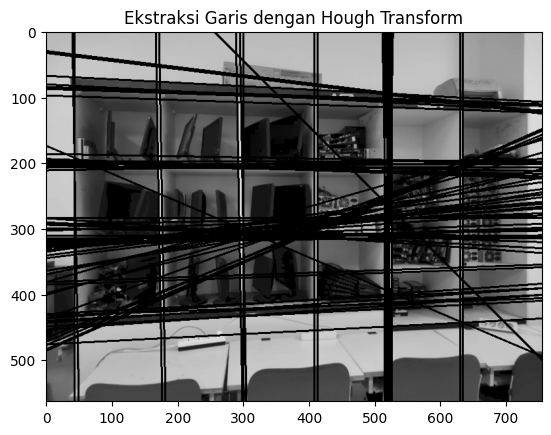

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Memastikan gambar berhasil dimuat
if image is None:
    print("Gambar tidak ditemukan.")
else:
    # Menerapkan deteksi tepi menggunakan Canny
    edges = cv2.Canny(image, 50, 150)

    # Menerapkan Hough Transform untuk mendeteksi garis
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Menampilkan garis yang terdeteksi
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            x1 = int(rho * np.cos(theta) - 1000 * np.sin(theta))
            y1 = int(rho * np.sin(theta) + 1000 * np.cos(theta))
            x2 = int(rho * np.cos(theta) + 1000 * np.sin(theta))
            y2 = int(rho * np.sin(theta) - 1000 * np.cos(theta))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # Menampilkan gambar hasil deteksi garis
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title('Ekstraksi Garis dengan Hough Transform')
        plt.show()
    else:
        print("Tidak ada garis yang terdeteksi.")


# **Template Matching untuk Deteksi Objek**

Template Matching digunakan untuk mencari objek dalam gambar berdasarkan template yang diberikan.

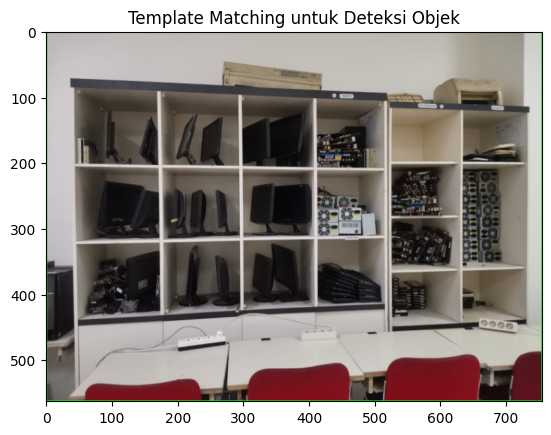

In [11]:
# Membaca gambar utama dan template
image = cv2.imread('image.jpg')
template = cv2.imread('template.jpg')

# Mengubah gambar dan template menjadi grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Mencocokkan template dengan gambar utama
result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(result >= threshold)

# Menandai lokasi template yang cocok
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

# Menampilkan hasil
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Template Matching untuk Deteksi Objek')
plt.show()

# **Pembuatan Pyramid Gambar**

Pyramid gambar adalah teknik untuk membuat beberapa salinan gambar dengan ukuran yang lebih kecil secara bertahap.

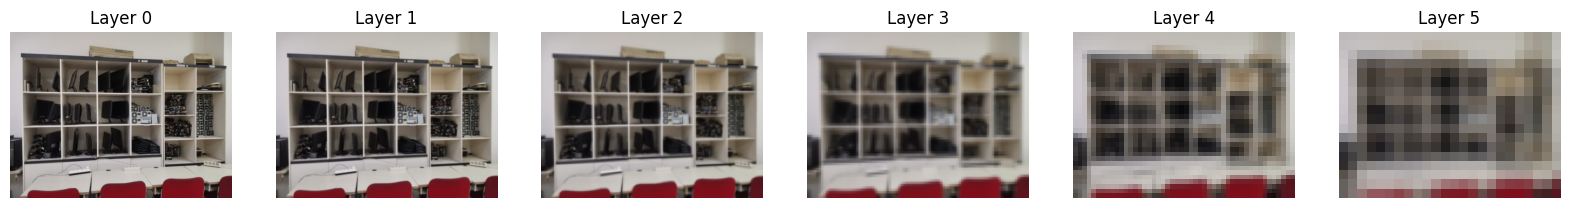

In [12]:
# Membaca gambar
image = cv2.imread('image.jpg')

# Membuat gambar pyramid
layer = image.copy()
gp = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)

# Menampilkan pyramid gambar
fig, axes = plt.subplots(1, 6, figsize=(20, 10))
for i in range(6):
    axes[i].imshow(cv2.cvtColor(gp[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Layer {i}')
    axes[i].axis('off')

plt.show()

# **Deteksi Lingkaran Menggunakan Hough Transform**

Untuk mendeteksi lingkaran.

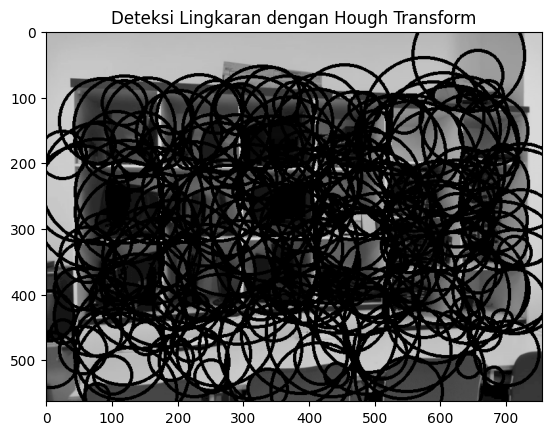

In [13]:
# Membaca gambar dalam grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Menerapkan GaussianBlur untuk mengurangi noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Menerapkan Hough Circle Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=100)

# Menggambar lingkaran pada gambar
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)

# Menampilkan gambar hasil deteksi lingkaran
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Deteksi Lingkaran dengan Hough Transform')
plt.show()


# **Ekstraksi Warna Dominan pada Gambar**

Menggunakan K-Means clustering untuk mengekstraksi warna dominan dalam gambar

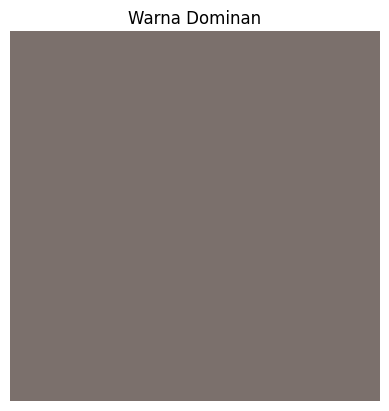

In [14]:
from sklearn.cluster import KMeans

# Membaca gambar
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mengubah gambar menjadi data 2D
image_data = image.reshape((-1, 3))

# Menggunakan K-Means untuk menemukan warna dominan
kmeans = KMeans(n_clusters=1)
kmeans.fit(image_data)
dominant_color = kmeans.cluster_centers_[0]

# Menampilkan warna dominan
dominant_color = np.round(dominant_color).astype(int)
plt.imshow([[dominant_color]])
plt.title('Warna Dominan')
plt.axis('off')
plt.show()

# **Deteksi Kontur pada Gambar**

Deteksi kontur adalah teknik untuk menemukan batas-batas objek dalam gambar

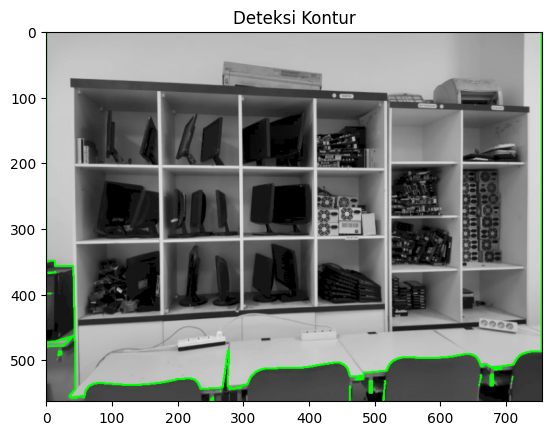

In [15]:
# Membaca gambar dalam grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Menggunakan threshold untuk mengubah gambar menjadi citra biner
_, thresholded = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendeteksi kontur pada gambar
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menggambar kontur pada gambar
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

# Menampilkan hasil deteksi kontur
image_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Deteksi Kontur')
plt.show()
